# Mushroom Classification
This is a quick project to test different machine learning models on a cleaned
simple dataset. This [dataset](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset) consists of 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible or definitely poisonous. Based on this dataset we will try to predict a given mushroom is edible or not by using its features.

You can also access this notebook from [Kaggle](https://www.kaggle.com/code/ufuktanriverdi/mushroom-classification).

# Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import xgboost as xgb
import tensorflow as tf

# Loading and Analyzing the data

In [28]:
df = pd.read_csv("mushrooms_cleaned.csv")

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.shape

(54035, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


Data has 54035 rows and all of them are non-null values. It's perfectly clean and we do not need to drop anything from the data.

# Preparing the data for the training

In [7]:
# Every column except the last column will be used as a feature
x = df[df.columns[:-1]]
# We will be trying to predict the last column which is called class.
y = df[df.columns[-1]]

In [8]:
# Splitting the data into two parts first
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)
# Then splitting the validation data from the training data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=1)
# Training data -> 0.64
# Validation data -> 0.16
# Testing data -> 0.2

# Training the models

This function will take the pipelines that we will define and train them with the given sets. It will return the performance metrics of the predictions after the training is done.

In [9]:
def run_model(pipeline, x_train, y_train, x_val, y_val, x_test, y_test):
    # Fit the pipeline on training data
    pipeline.fit(x_train, y_train)

    # Predictions on validation and test set
    y_val_pred = pipeline.predict(x_val)
    y_test_pred = pipeline.predict(x_test)

    # Collect metrics
    metrics = {
        'Model': str(pipeline.steps[-1][1].__class__.__name__),
        'Validation Accuracy': accuracy_score(y_val, y_val_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Validation Precision': precision_score(y_val, y_val_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Validation Recall': recall_score(y_val, y_val_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Validation F1': f1_score(y_val, y_val_pred),
        'Test F1': f1_score(y_test, y_test_pred)
    }

    # Prints all the metrics together
    print(classification_report(y_test, y_test_pred))

    return metrics

# This will be useful for plotting all the metrics we have at the end of the code
metrics_list = []
def add_metrics(metrics):
    for i in metrics_list:
        if i["Model"] == metrics["Model"]:
            metrics_list.remove(i)
            break
    metrics_list.append(metrics)

### Logistic Regression

In [10]:
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
add_metrics(run_model(lr_pipeline, x_train, y_train, x_val, y_val, x_test, y_test))


              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4872
           1       0.65      0.71      0.68      5935

    accuracy                           0.63     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.63      0.63     10807



### Random Forest Classifier

In [11]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1, max_depth=14))
add_metrics(run_model(rf_pipeline, x_train, y_train, x_val, y_val, x_test, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4872
           1       0.99      0.98      0.99      5935

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



### Support Vector Machine

In [12]:
svm_pipeline = make_pipeline(StandardScaler(), SVC())
add_metrics(run_model(svm_pipeline, x_train, y_train, x_val, y_val, x_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4872
           1       0.91      0.90      0.91      5935

    accuracy                           0.90     10807
   macro avg       0.90      0.90      0.90     10807
weighted avg       0.90      0.90      0.90     10807



### K-Nearest Neighbors Classifier

In [13]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
add_metrics(run_model(knn_pipeline, x_train, y_train, x_val, y_val, x_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5935

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



### Gaussian Naive Bayes Classifier

In [14]:
nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
add_metrics(run_model(nb_pipeline, x_train, y_train, x_val, y_val, x_test, y_test))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56      4872
           1       0.65      0.71      0.68      5935

    accuracy                           0.63     10807
   macro avg       0.62      0.62      0.62     10807
weighted avg       0.63      0.63      0.63     10807



### Decision Tree Classifier

In [15]:
tree_pipeline = make_pipeline(StandardScaler(), tree.DecisionTreeClassifier())
add_metrics(run_model(tree_pipeline, x_train, y_train, x_val, y_val, x_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4872
           1       0.98      0.98      0.98      5935

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



### XGBoost Classifier

In [16]:
xg_pipeline = make_pipeline(StandardScaler(), xgb.XGBClassifier())
add_metrics(run_model(xg_pipeline, x_train, y_train, x_val, y_val, x_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5935

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



### Neural Network

In [17]:
# First we need to scale the data for the neural network
# This part was automatically handled with the help of pipelines in the previous examples
# But for the neural network, we need to scale manually
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [21]:
# Neural network structure
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.05),
    # Last layer should be just one neuron
    # We should use the sigmoid function because the output must be in between 0 and 1
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [23]:
# Compiling the model
# Loss function is binary_crossentropy to get the best results on binary classification
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
# Parameters are tuned to get the best results
history = nn_model.fit(x_train_scaled, y_train, epochs=80, batch_size=500, validation_data=(x_val_scaled, y_val))
# Prediction will be between 0 and 1 because of the sigmoid function
# Making these predictions binary with these lines
y_val_pred_nn = (nn_model.predict(x_val_scaled) > 0.5).astype("int32").reshape(-1)
y_test_pred_nn = (nn_model.predict(x_test_scaled) > 0.5).astype("int32").reshape(-1)

# Metrics dictionary just like in other models' format
nn_metrics = {
    'Model': 'Neural Network',
    'Validation Accuracy': accuracy_score(y_val, y_val_pred_nn),
    'Test Accuracy': accuracy_score(y_test, y_test_pred_nn),
    'Validation Precision': precision_score(y_val, y_val_pred_nn),
    'Test Precision': precision_score(y_test, y_test_pred_nn),
    'Validation Recall': recall_score(y_val, y_val_pred_nn),
    'Test Recall': recall_score(y_test, y_test_pred_nn),
    'Validation F1': f1_score(y_val, y_val_pred_nn),
    'Test F1': f1_score(y_test, y_test_pred_nn)
}
print(classification_report(y_test, y_test_pred_nn))
add_metrics(nn_metrics)

Epoch 1/80
70/70 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.9027 - val_loss: 0.2040 - val_accuracy: 0.9242
Epoch 2/80
70/70 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9089 - val_loss: 0.1942 - val_accuracy: 0.9294
Epoch 3/80
70/70 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9116 - val_loss: 0.1858 - val_accuracy: 0.9340
Epoch 4/80
70/70 [==============================] - 0s 4ms/step - loss: 0.2145 - accuracy: 0.9170 - val_loss: 0.1811 - val_accuracy: 0.9340
Epoch 5/80
70/70 [==============================] - 0s 4ms/step - loss: 0.2090 - accuracy: 0.9185 - val_loss: 0.1745 - val_accuracy: 0.9362
Epoch 6/80
70/70 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9213 - val_loss: 0.1696 - val_accuracy: 0.9403
Epoch 7/80
70/70 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.9242 - val_loss: 0.1625 - val_accuracy: 0.9419
Epoch 8/80
70/70 [==

# Making a graph of the performance metrics of the models

In [26]:
def plot_metrics(metrics_df):
    metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
    plt.xticks(rotation=45)
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.legend(loc='lower right')
    plt.show()

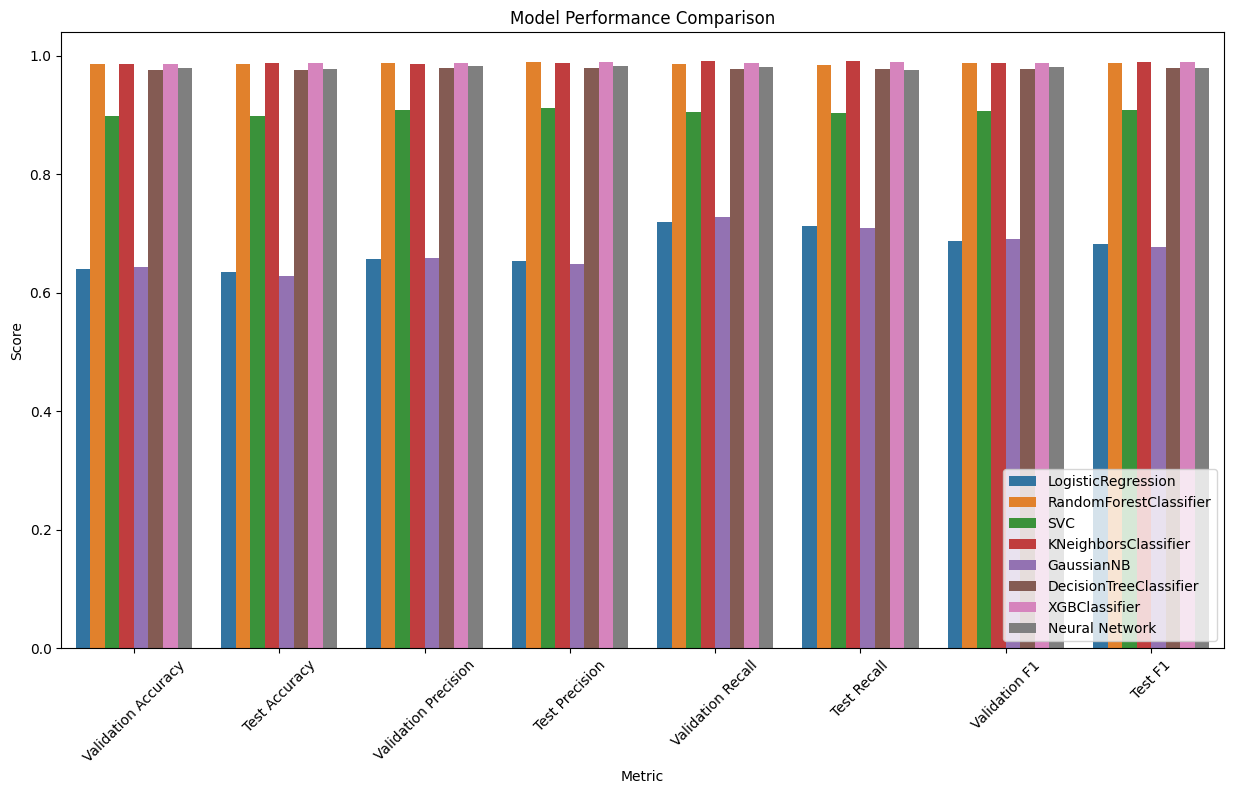

In [27]:
plot_metrics(pd.DataFrame(metrics_list))